In [1]:
import numpy as np
import pandas as pd

import random
import os

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [25]:
png_filepath = 'pngs_test/'
filepath = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/results/data/'
hdu_list = fits.open(filepath + 'Unique_positives_complete.fits')
images = hdu_list[1].data 
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

to_explore = pd.read_csv('explore_coadd_ids_2.csv')
mask = data['COADD_OBJECT_ID'].isin(to_explore['COADD_OBJECT_ID'])

data = data[mask]
images = images[data.index]
print(len(data), len(images))

21 21


In [30]:
def make_plot_all(objects, title, data, Q, stretch, minimum):
    for i in range(len(objects)):
        if(i%7 == 0):
            plt.figure(figsize=(10,2))
            for j in range(7):
                if(i+j > len(objects)-1): break
                plt.subplot(1,7,j+1)
                #print(data['COADD_OBJECT_ID'].iloc[i+j]) 
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], 
                                    Q=Q, stretch=stretch, minimum=minimum)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            #plt.savefig(png_filepath + title + '.png', bbox_inches='tight')
            plt.show() 

def make_plot_proposal(objects, title, data, Q, stretch, minimum):
    plt.figure(figsize=(10,4))
    for n in range(len(objects)):
        plt.subplot(3, 7, n+1)
        plt.subplots_adjust(wspace=0.15, hspace=0.15)#9, 90, (2, 2, 2)
        rgb = make_lupton_rgb(objects[n][2], objects[n][1], objects[n][0], Q=Q, stretch=stretch, minimum=minimum)
        plt.imshow(rgb, aspect='equal')
        plt.xticks([], [])
        plt.yticks([], []) 
    #plt.savefig(png_filepath + title + '.png', bbox_inches='tight')
    plt.show()

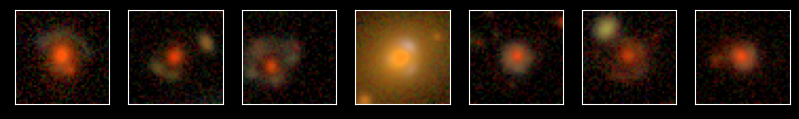

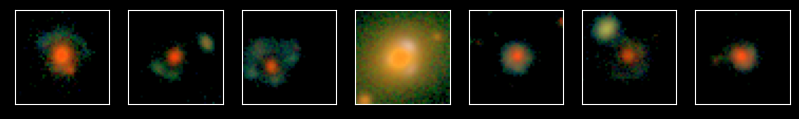

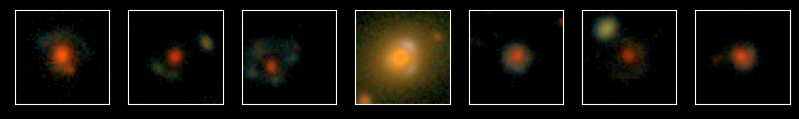

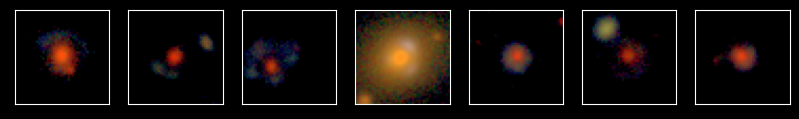

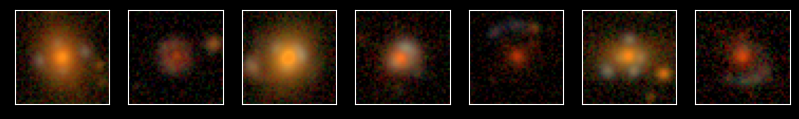

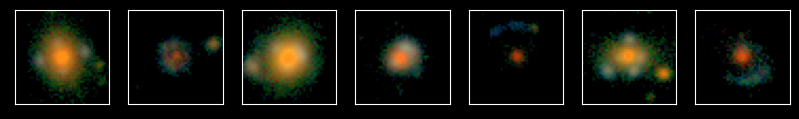

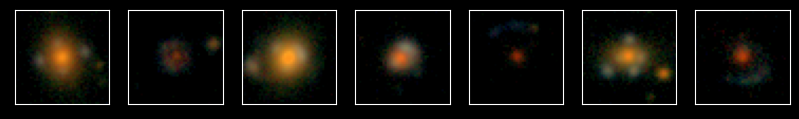

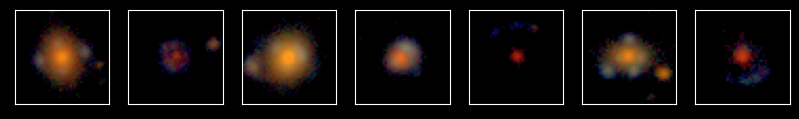

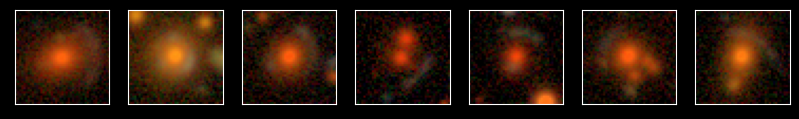

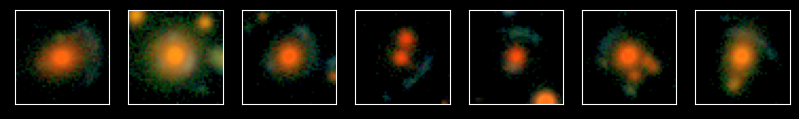

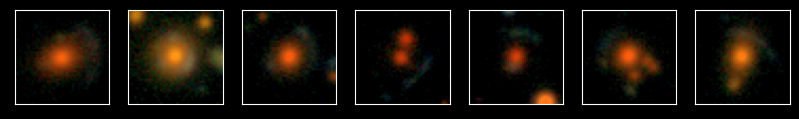

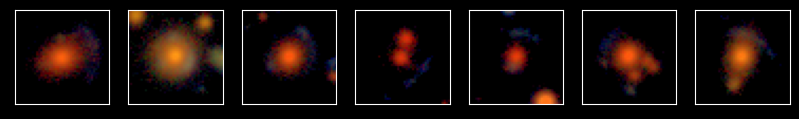

In [43]:
for i in range(3):
    images_tmp = images[i*7: (i*7)+7]
    data_tmp = data.iloc[i*7: (i*7)+7]
    
    Q, stretch, minimum = 9, 42, (0,0,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    Q, stretch, minimum = 8, 35, (14,2,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    Q, stretch, minimum = 8, 70, (10,2,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    
    Q, stretch, minimum = 10.5, 37, (14,8,0)
    make_plot_all(images_tmp, 'title', data_tmp, Q, stretch, minimum)
    print(' ')

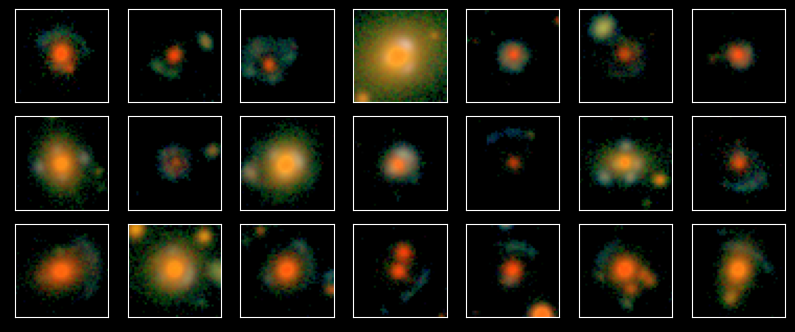

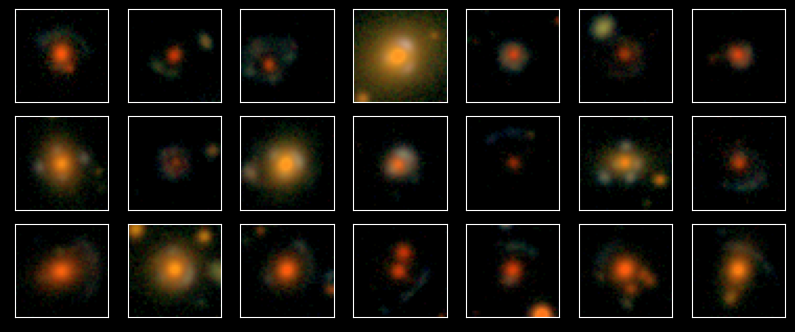

In [45]:
Q, stretch, minimum = 8, 35, (14,2,0)
make_plot_proposal(images, 'title', data, Q, stretch, minimum)

Q, stretch, minimum = 8, 70, (10,2,0)
make_plot_proposal(images, 'title', data, Q, stretch, minimum)